In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def permutate(T, vector):
    swaps = int(len(vector)*T)
    for i in range(swaps):
        i = np.random.randint(len(vector))
        j = np.random.randint(len(vector))
        vector[[i, j],:] = vector[[j, i],:]
    return vector

In [5]:
def uniform_points(n):
    return np.random.random((n,2))

In [44]:
def normal_points(n,parts):
    sqrt =int(np.sqrt(parts))
    centres = np.array([[[parts*i,parts*j] for i in range(sqrt)]for j in range(sqrt)]).reshape((parts,2))
    print(centres)
    return np.array([[np.random.normal(loc = i, scale = 0.3) for j in range(n//parts)]for i in centres]).reshape((n,2))

[[ 0  0]
 [ 9  0]
 [18  0]
 [ 0  9]
 [ 9  9]
 [18  9]
 [ 0 18]
 [ 9 18]
 [18 18]]


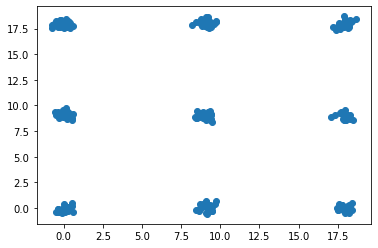

In [48]:
points = normal_points(270,9)
points
plt.scatter(points[:,0],points[:,1])

In [40]:
permutate(0.8,points)

array([[0.11472677, 0.68353371],
       [0.82133205, 0.48224665],
       [0.50948079, 0.85293877],
       [0.60434514, 0.00760098],
       [0.11489044, 0.44044725]])

In [52]:
def length(points):
    simple_points = [(points[i][0],points[i][1]) for i in range(len(points))]
    vectors = [(points[i][0]-points[i-1][0],points[i][1]-points[i-1][1]) for i in range(1,len(points))]
    return sum([i[1]**2+i[0]**2 for i in vectors])

In [53]:
points = uniform_points(100)

In [54]:
def annealing(points):
    best = points
    best_len = length(best)
    T =1
    while T > 0.2:
        points = best
        permutate(T, points)
        p_len = length(points) 
        if p_len< best_len:
            best_len = p_len
            best = points
        T *= 0.95
    return best
        

In [60]:
def visualize(states):
    n = len(states)
    div = n//15
    for i in range(0,n,div):
        plt.plot(states[i][:,0],states[i][:,1])
        plt.show()

In [63]:
def draw_annealing(points):
    best = points
    best_len = length(best)
    states = [best]
    T =0.95
    lengths =[best_len]
    while T > 0.002:
        points = best.copy()
        permutate(T, points)
        p_len = length(points) 
        lengths.append(p_len.copy())
        states.append(points.copy())
        if p_len< best_len:
            best_len = p_len
            best = points.copy()
        T *= 0.99
    plt.plot([i for i in range(len(lengths))],lengths)
    plt.show()
    visualize(states)
    return best

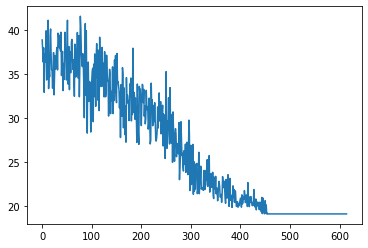

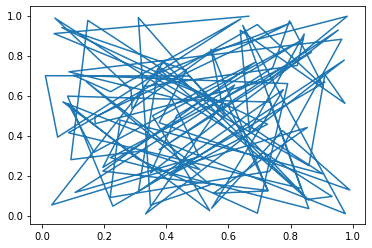

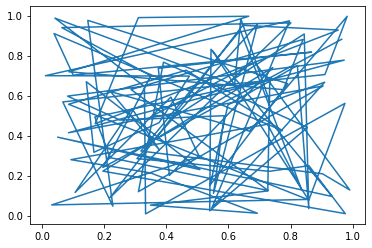

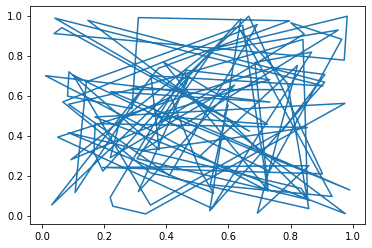

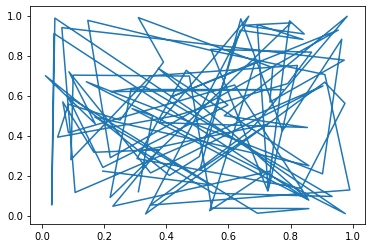

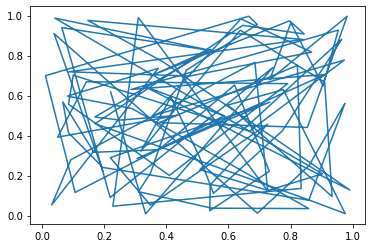

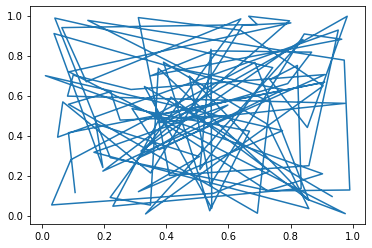

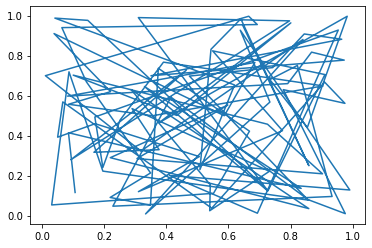

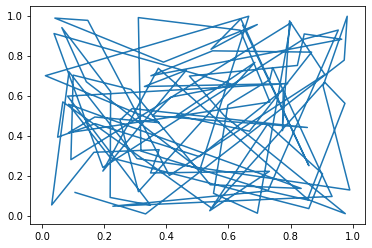

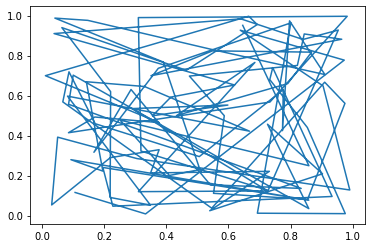

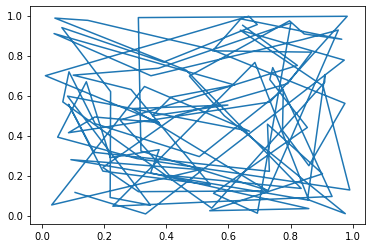

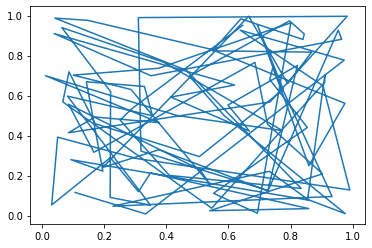

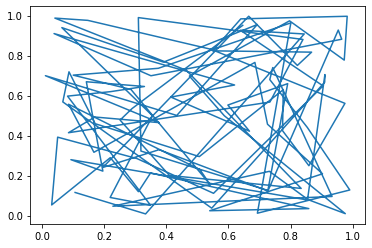

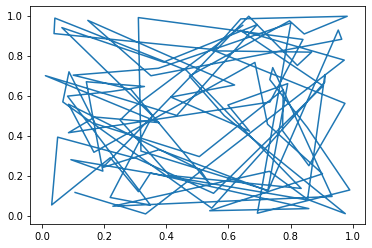

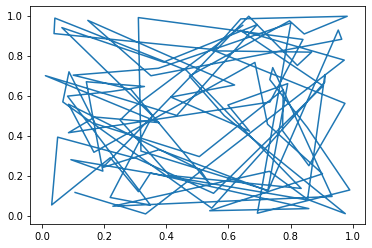

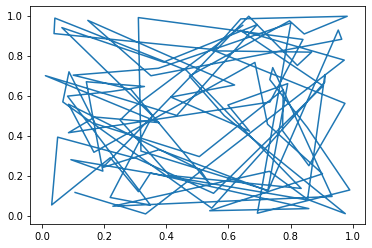

In [64]:
sizes = [100,500,10000]
best = draw_annealing(points)